## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import warnings

from annotations import *
from utils.data.data_augmentation import *
from utils.data.data_ops import move_val_split_to_train
from utils.input_output.io import load_np_arrays, load_images
from utils.input_output.io import load_gt_counts
from utils.visualization.vis import plot_aug16

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. VGG Cells Dataset

In [4]:
DATASET_PATH = '../../datasets/vgg_cells'
TRAIN_PATH = f'{DATASET_PATH}/train'
TRAIN_IMG_PATH = f'{TRAIN_PATH}/images'
TRAIN_GT_DOTS_PATH = f'{TRAIN_PATH}/gt_dots'
TRAIN_GT_COUNTS_PATH = f'{TRAIN_PATH}/gt_counts'
TRAIN_GT_DENSITY_MAPS_PATH = f'{TRAIN_PATH}/gt_density_maps'

VAL_PATH = f'{DATASET_PATH}/val'

TEST_PATH = f'{DATASET_PATH}/test'
TEST_IMG_PATH = f'{TEST_PATH}/images'
TEST_GT_DOTS_PATH = f'{TEST_PATH}/gt_dots'
TEST_GT_COUNTS_PATH = f'{TEST_PATH}/gt_counts'
TEST_GT_DENSITY_MAPS_PATH = f'{TEST_PATH}/gt_density_maps'

In [5]:
#move_val_split_to_train(VAL_PATH, TRAIN_PATH)

In [6]:
print(DATASET_PATH)
print(os.listdir(DATASET_PATH))

../../datasets/vgg_cells
['test', 'train', 'val']


In [7]:
print(TRAIN_PATH)
print(os.listdir(TRAIN_PATH))

../../datasets/vgg_cells/train
['gt_counts', 'gt_density_maps', 'gt_dots', 'images']


In [8]:
train_img_names = sorted(os.listdir(TRAIN_IMG_PATH))
train_dots_names = sorted(os.listdir(TRAIN_GT_DOTS_PATH))
test_img_names = sorted(os.listdir(TEST_IMG_PATH))
test_dots_names = sorted(os.listdir(TEST_GT_DOTS_PATH))

print(f'train split: {len(train_img_names)} images')
print(train_img_names[:3])
print(train_dots_names[:3])

print(f'\ntest split: {len(test_img_names)} images')
print(test_img_names[:3])
print(test_dots_names[:3])

train split: 64 images
['001cell.png', '002cell.png', '003cell.png']
['001dots.png', '002dots.png', '003dots.png']

test split: 100 images
['101cell.png', '102cell.png', '103cell.png']
['101dots.png', '102dots.png', '103dots.png']


In [9]:
train_dots_names = sorted(os.listdir(TRAIN_GT_DOTS_PATH))
test_dots_names = sorted(os.listdir(TEST_GT_DOTS_PATH))

print(TRAIN_GT_DOTS_PATH)
print(train_dots_names[:5])

print(TEST_GT_DOTS_PATH)
print(test_dots_names[:5])

../../datasets/vgg_cells/train/gt_dots
['001dots.png', '002dots.png', '003dots.png', '004dots.png', '006dots.png']
../../datasets/vgg_cells/test/gt_dots
['101dots.png', '102dots.png', '103dots.png', '104dots.png', '105dots.png']


#### Load some train images and density maps

In [10]:
train_images = load_images(TRAIN_IMG_PATH, train_img_names, num_images=3)
print(len(train_images))
print(train_images[0].dtype)
print(train_images[0].min(), train_images[0].max())

3
float64
0.0 0.9882352941176471


In [11]:
train_gt_density_maps = load_np_arrays(TRAIN_GT_DENSITY_MAPS_PATH, num=3)
print(len(train_gt_density_maps))
print(train_gt_density_maps.dtype)

3
float64


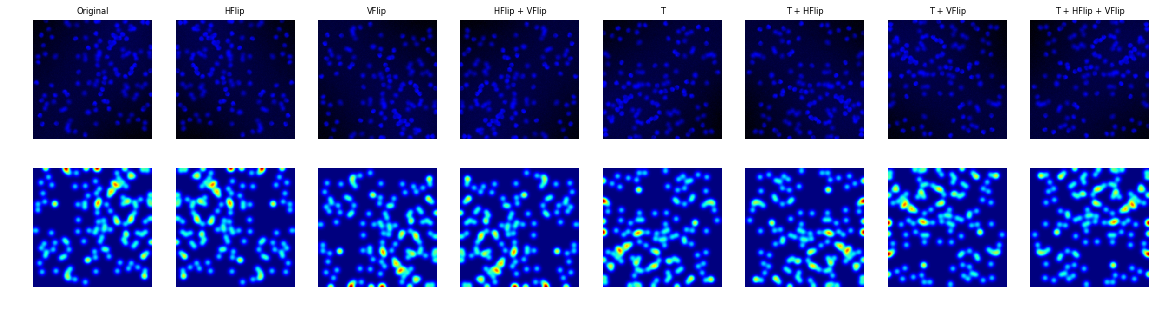

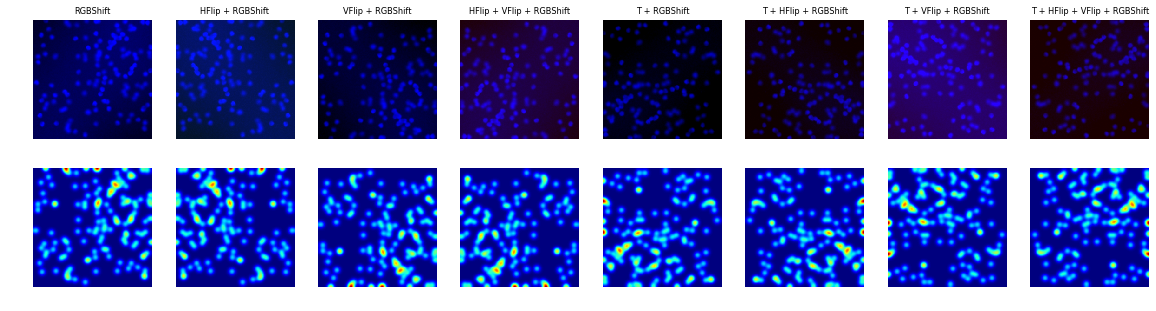

In [12]:
for i in range(1):
    img = train_images[i]
    mask = train_gt_density_maps[i]
    img_name = train_img_names[i]
    
    aug_list1 = flip_transpose(img, mask)    
    aug_list2 = rgb_shift(aug_list1, rseed=641)
    
    plot_aug16(aug_list1 + aug_list2)

In [13]:
SAVE_PATH = './aug_dir'
augment16_from_dir_and_save(in_path='../../datasets/vgg_cells/train',
                            save_path=SAVE_PATH,
                            rseed=641)